#**Introduction to Financial Python**
##Random Variables and Distributions

##**Introduction**

In the last chapter we learned the definition of mean and variance, which are kind of point estimation. Point estimation means using sample data to calculate a single value which is to serve as a 'best estimation' of an unknown population. However, this it not enough because point estimations can be deceiving. We need to use more rigorous methods to test our ideas. That's why we consider distribution and hypothesis testing. Random variable distribution is the basis for almost all quantitative finance topics: linear regression, CAPM, Black-Scholes, binomial tree pricing, etc. 

##**Random Variables**

First let's start with the concept of random variable. A random variable can be thought of as a drawing from a distribution whose outcome prior to the draw is uncertain. Imagine rolling a dice, you know that your chance of getting each is 1/6, but you don't know what's the number of your next roll is. If we roll the dice N times and record the number of each roll, a collection of those numbers is called discrete random variable. A discrete variable can take on a finite number of values. For our example, we can only take numbers from {1,2,3,4,5,6}. The other kind of variable is continuous random variable. A continuous variable can take on any value in a given range. You can think the rate of return as a continuous variable, it theoretically can take any value from $(-\infty, +\infty)$.

##**Distributions**

Each random variable follows a probability distribution, which is a function that can be thought of as providing the probabilities of occurrence of different possible outcomes in an experiment. In our dice example, the probability distribution of each number is 1/6. We usually use $P(X)$ to represent a probability distribution function, where $X$ is the outcome value. In our example, $P(1) = P(2) = p(3) = 1/6$. However, we can't use this for a continuous distribution, because the probability of drawing a specific number from a continuous variable is 0, due to the infinite possible outcomes we have. Instead, we use probability density function (PDF) function to describe the probability that a value is in a specific range. We cover this later. For each probability distribution function, we have a cumulative distribution function (CDF). It is defined as $P(X\leq x)$, which models the probability that the random variable $X$ will take a value less than or equal to x. For discrete random variables, we just sum up the values less than or equal to x and then divide it with number of observations.

###**Uniform Distribution**

Uniform distribution is the simplest type of probability distribution. A discrete uniform distribution has equal weight assigned to all outcomes. Both rolling a dice and tossing a fare coin are classical uniform distributions. Here we use python to simulate rolling a dice 10000 times. 

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#define a function to simulate rolling a dice
def dice():
    number=  [1,2,3,4,5,6]
    return random.choice(number)

series = np.array([dice() for x in range(10000)])
print(series)

[5 4 2 ... 3 1 3]


We create a series of random variables here. We can plot the values on the x-axis and put their numbers of occurrences on the y-axis to have a direct view of the distribution: 

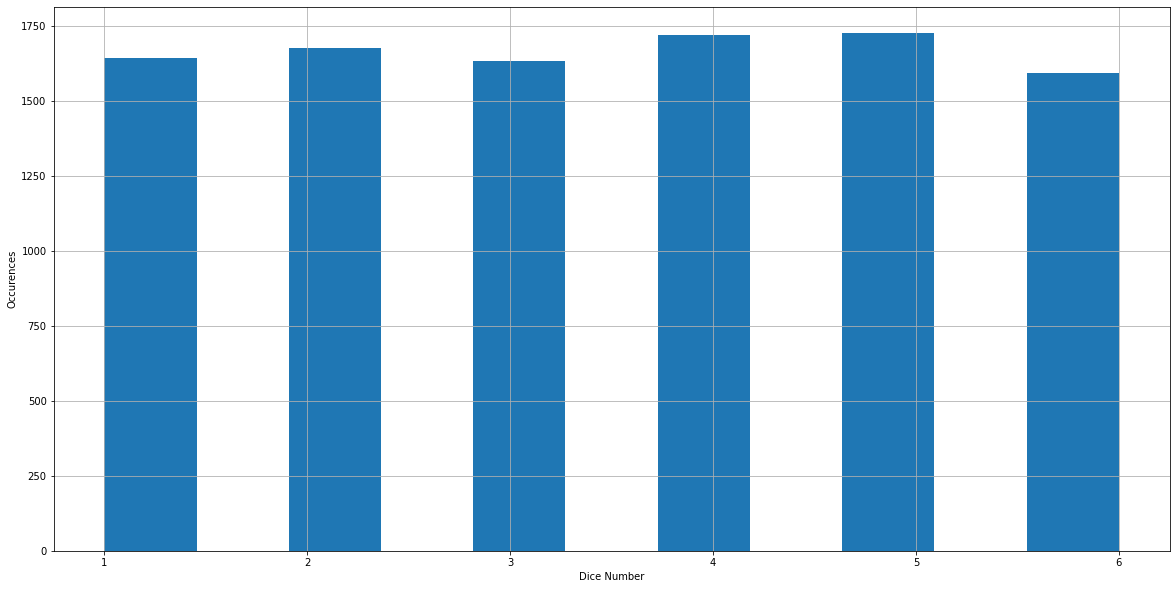

In [ ]:
plt.figure(figsize = (20,10))
plt.hist(series,bins = 11,align = 'mid')
plt.xlabel('Dice Number')
plt.ylabel('Occurences')
plt.grid()
plt.show()

Let's say we want to know the frequency that the observations are less than or equal to 3. In other words we want to seek the value of $P(X\leq 3)$.

In [ ]:
print(len([x for x in series if x <= 3])/float(len(series)))
print(np.mean(series))

0.4956
3.4993


$P(X\leq 3)$ is very close to 0.5. This is not surprising because we rolled the dice 1000 times, and the frequency that the observations are less than or equal to 3 should be close to the real probability, which is 0.5. For a given uniform distribution, it's straightforward to calculate its mean: it's the center of the distribution because every outcome is of equal weight. For our dice example, we can think of it as

$\mu = (1+2+3+4+5+6)/6 = 3.5$

Or

$E(x) = 1*\frac{1}{6} + 2*\frac{1}{6}+...+6*\frac{1}{6} = 3.5$

More generally, if we a assume the minimum value in a uniform distribution is a and the maximum value is b, the mean can be given by:

$\bar{u} = \frac{a+b}{2}$

Usually we use $\bar{u}$ to represents the population mean, or the 'real mean'. Here we create a sample with 1000 observations, the mean we calculated above is the sample mean. Sample mean usually doesn't equal to the theoretical population mean unless the number of observation approaches to infinity. The variance is given by:

$\sigma^2 = \frac{(b-a)^2}{12}$

Deducing the formula is out of our lecture scope. It's useful to realize for a given standard distribution, we can formularize its mean and variance.

###**Binomial Distribution**

A binomial distribution is a discrete probability distribution of the number of successes in a sequence of n independent experiments. Let's assume that the market has 50% probability goes up and 50% probability goes down, and we observe it in the next 10 days, what's the distribution of the number of days it goes up? This is a binomial distribution example. In general, if we carry out the experiment n times, and each outcome is independent, with the same probability of success p, the probability of getting exactly k successes is given by the function: 

$P(X = K) = C_n^k p^k (1-p)^{n-k}$

Where:

$C_n^k = \frac{n!}{(n-k)!k!}$

Under such circumstance we say X follows the binomial distribution $X \sim B(n,p)$. Let's simulate a binomial experiment with success rate p = 0.7 and experiment times n = 10

In [ ]:
def trial():
    number = [1,2,3,4,5,6,7,8,9,10]
    a = random.choice(number)
    if a<= 7:
        return 1
    else:
        return 0

Each time we execute trial(), we did an experiment. If it succeed, it will return 1, otherwise it will return 0. Now we are going to do the experiment 10 times: 

In [ ]:
res = [trial() for x in range(10)]
print(sum(res))

8


Now we did the experiment 10 times, and the number of success is sum(res). However, it just means during these 10 experiments we succeed sum(res) times. If we want to see the binomial distribution, we need experiment N times. When n is large enough, our frequency will approach the theoretical probability. Here we simulate each outcome 10000 times: 

In [ ]:
def binomial(number):
    l = []
    for i in range(10000):
        res = [trial() for x in range(10)]
        l.append(sum(res))
    return len([x for x in l if x == number])/float(len(l))
print(binomial(8))

0.2353


The number printed above is the simulated probability that we succeed 8 times if we experiment 10 times. For each possible outcome, we simulate the probability: 

In [ ]:
prob = []
for i in range(1,11):
    prob.append(binomial(i))
prob_s = pd.Series(prob,index = range(1,11))
print(prob_s)

1     0.0000
2     0.0015
3     0.0088
4     0.0368
5     0.1082
6     0.2016
7     0.2690
8     0.2389
9     0.1195
10    0.0295
dtype: float64


Here we got the simulated result of the binomial distribution. Now we are going to check if the simulated frequencies close enough to the theoretical probabilities. Let's take X = 7 and X = 8 as example: 

In [ ]:
print((float(factorial(10))/(factorial(7)*factorial(10-7)))*(0.7**7)*(0.3**3))

0.2668279319999998


In [ ]:
print((float(factorial(10))/(factorial(8)*factorial(10-8)))*(0.7**8)*(0.3**2))

0.23347444049999988


As we can see, the simulated results are pretty close to the real probability. we can plot the results as follows: 

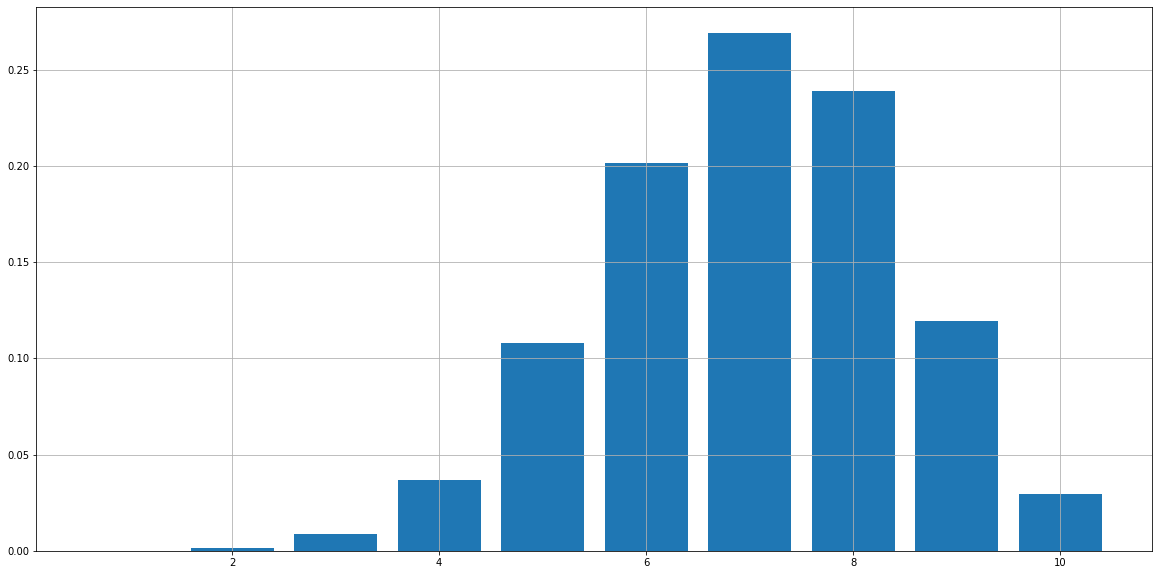

In [ ]:
plt.figure(figsize = (20,10))
plt.bar(range(1,11),prob)
plt.grid()
plt.show()

Another good property of binomial distribution is that its mean and variance are simple enough:

$\bar{u} = np$

$\sigma^2 = np(1-P)$

We will not introduce the deduction here, but if you are interested in it, we encourage you to do it yourself, based on the probability functions we provided above. 

###**Normal Distribution**

Before looking at normal distribution, let's first talk about continues distribution. As we mentioned above, we use a probability density function(PDF) to model the probability that our value is taken our a specific range. We define it as: 

$P(a < X < b) = \int_{a}^{b}f_x(x)dx$

Now we can talk about the normal distribution. The normal distribution is most commonly used distribution in natural sciences, of course also in financial research. The PDF of normal distribution is given as follows: 

$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

Where $\mu$ is the mean of the normal distribution, and $\sigma$ is the standard deviation.

Generally, if a random variable X follows normal distribution, we represent it by $X\sim N(\mu, \sigma^2)$. Specifically, if a normal distribution has a 0 mean and 1 standard deviation, we called it standard normal distribution. Now let's simulate a standard normal distribution using Python packages to see what it looks like:

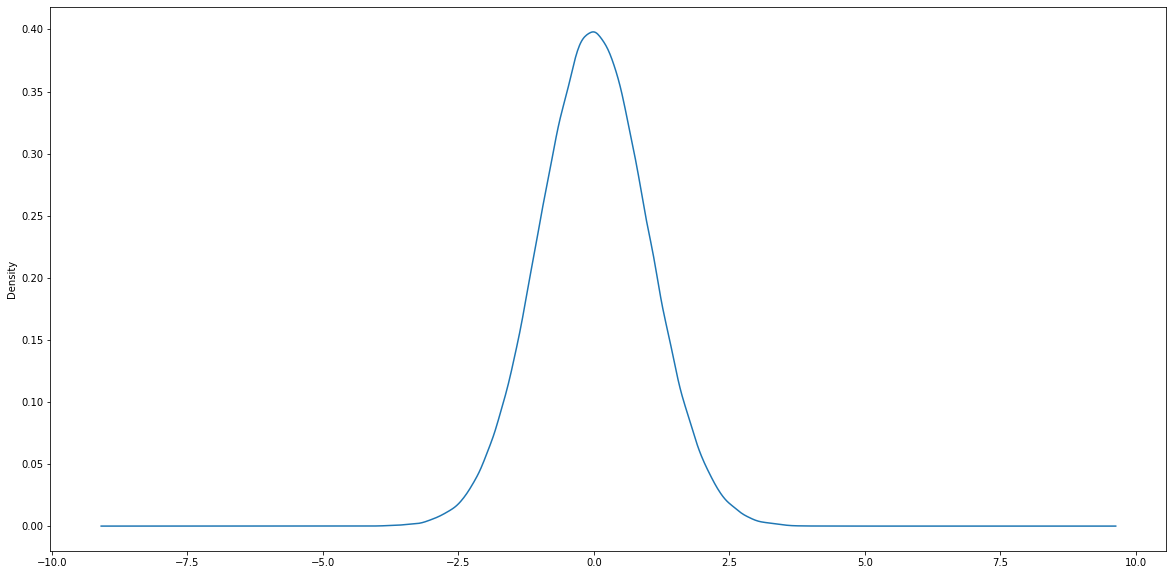

In [ ]:
norm = pd.Series(np.random.normal(0,1,150000))
plt.figure(figsize = (20,10))
norm.plot.density()
plt.show()

Financial data is highly disordered and is considered to has lots of noise. Most of the time we believe those noise follows normal distribution. It's also widely believed that the return on an asset over a short period of time follows normal distribution. Let's check it with the daily logarithm rates of return on AAPL: 

In [ ]:
!pip install quandl
import quandl
quandl.ApiConfig.api_key = 'o-cy4Nq8s6xiNYy3u1rX'
aapl_table = quandl.get('WIKI/AAPL')
aapl = aapl_table.loc['2009':'2017',['Open','Close']]
aapl['log_return'] = np.log(aapl.Close).diff()
aapl = aapl.dropna()

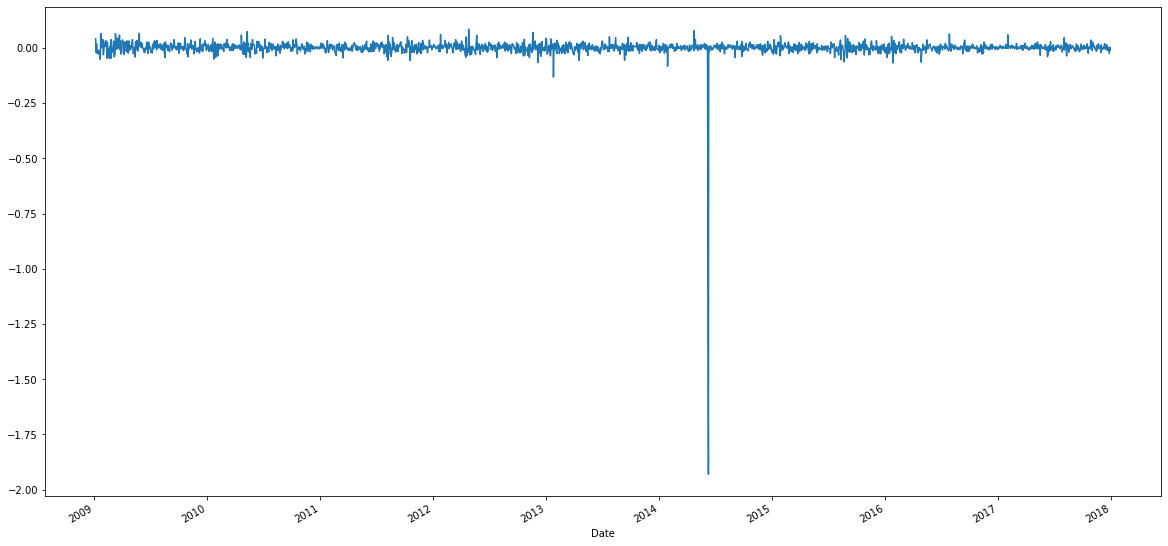

In [ ]:
plt.figure(figsize = (20,10))
aapl.log_return.plot()
plt.show()

This is a classic daily return chart. Let's now plot the density chart of the returns: 

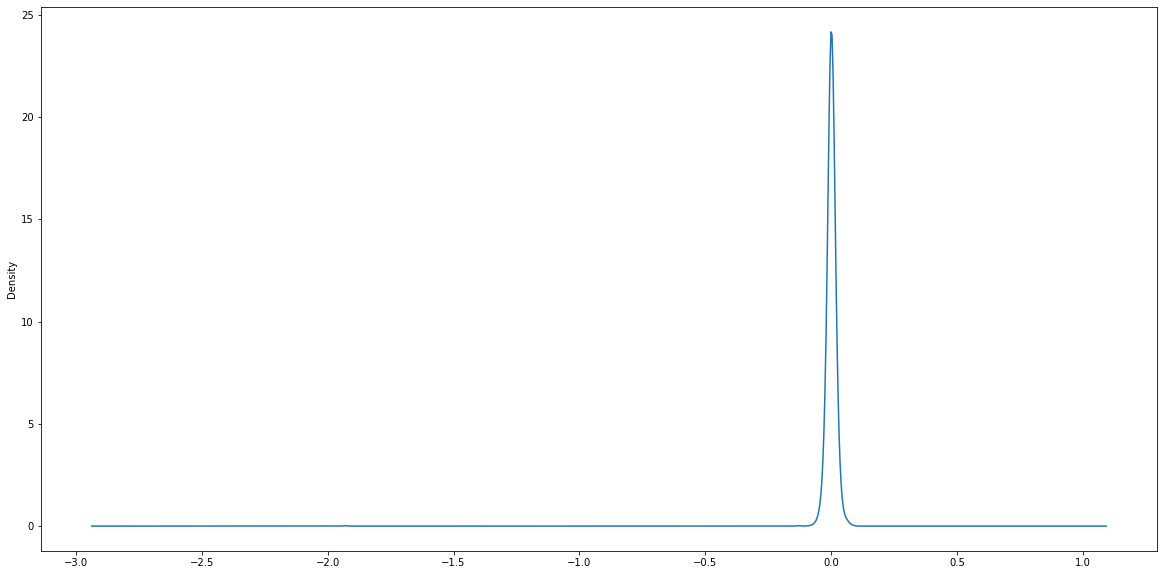

In [ ]:
plt.figure(figsize = (20,10))
aapl.log_return.plot.density()
plt.show()

If we observe the x-axis and y-axis carefully, we can see the return of asset is not a standard normal distribution. The peak of the standard normal distribution plot is around 0.4, while it's over 0.6 for this chart. This is because the standard deviation σ of the return is obviously not 1. We can demonstrate the normal distribution with different mean and variance by simulation: 

<Figure size 1440x720 with 0 Axes>

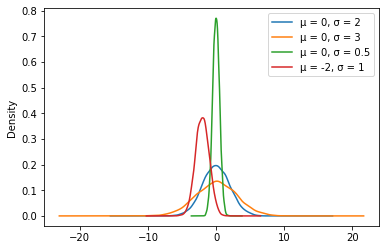

In [ ]:
de_2 = pd.Series(np.random.normal(0,2,10000),name = 'μ = 0, σ = 2')
de_3 = pd.Series(np.random.normal(0,3,10000),name = 'μ = 0, σ = 3')
de_0 = pd.Series(np.random.normal(0,0.5,10000), name ='μ = 0, σ = 0.5')
mu_1 = pd.Series(np.random.normal(-2,1,10000),name ='μ = -2, σ = 1')
df = pd.concat([de_2,de_3,de_0,mu_1],axis = 1)
plt.figure(figsize=(20,10))
df.plot.density()
plt.show()

##**Summary**

 In this chapter we introduced random variable, the difference between discrete random distribution and continuous random distribution, and most importantly, normal distribution. In the next chapter we will introduce how to use these distributions to test our idea or generating trading signals.
